# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [99]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
#from citipy import citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [100]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

629

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [101]:
url_city = "http://api.openweathermap.org/data/2.5/weather?appid="+weather_api_key+"&q="
count_city = 0
weather_list = []
for city in cities:
    url_city_complete = url_city+city+"&units=imperial"
    weather_response = requests.get(url_city_complete).json()
    weather_list.append(weather_response)
    print(f"#{count_city} city: {city} information was requested")
    count_city += 1


#0 city: port hueneme information was requested
#1 city: tabat information was requested
#2 city: tsihombe information was requested
#3 city: deputatskiy information was requested
#4 city: kapaa information was requested
#5 city: isangel information was requested
#6 city: gazli information was requested
#7 city: hithadhoo information was requested
#8 city: ushuaia information was requested
#9 city: dingle information was requested
#10 city: new norfolk information was requested
#11 city: atuona information was requested
#12 city: arraial do cabo information was requested
#13 city: iskateley information was requested
#14 city: qaanaaq information was requested
#15 city: hofn information was requested
#16 city: karkaralinsk information was requested
#17 city: jamestown information was requested
#18 city: lolua information was requested
#19 city: mar del plata information was requested
#20 city: magole information was requested
#21 city: port hardy information was requested
#22 city: sanm

#179 city: faanui information was requested
#180 city: souillac information was requested
#181 city: kavieng information was requested
#182 city: attawapiskat information was requested
#183 city: olinda information was requested
#184 city: along information was requested
#185 city: talnakh information was requested
#186 city: bluff information was requested
#187 city: beringovskiy information was requested
#188 city: hamilton information was requested
#189 city: camacha information was requested
#190 city: buique information was requested
#191 city: bambous virieux information was requested
#192 city: taseyevo information was requested
#193 city: palmer information was requested
#194 city: golkoy information was requested
#195 city: nastola information was requested
#196 city: nanortalik information was requested
#197 city: shimoda information was requested
#198 city: lewistown information was requested
#199 city: tiarei information was requested
#200 city: touros information was reque

#357 city: fairbanks information was requested
#358 city: kananga information was requested
#359 city: ondorhaan information was requested
#360 city: sibolga information was requested
#361 city: derzhavinsk information was requested
#362 city: vega de alatorre information was requested
#363 city: athabasca information was requested
#364 city: tessalit information was requested
#365 city: kodiak information was requested
#366 city: cayenne information was requested
#367 city: kaduqli information was requested
#368 city: maneadero information was requested
#369 city: bentonville information was requested
#370 city: burnie information was requested
#371 city: tondano information was requested
#372 city: gharghoda information was requested
#373 city: jaisalmer information was requested
#374 city: sinjai information was requested
#375 city: tual information was requested
#376 city: launceston information was requested
#377 city: sobolevo information was requested
#378 city: yerbogachen info

#535 city: coihaique information was requested
#536 city: bonfim information was requested
#537 city: novyy urengoy information was requested
#538 city: borogontsy information was requested
#539 city: quchan information was requested
#540 city: pedasi information was requested
#541 city: khonuu information was requested
#542 city: heihe information was requested
#543 city: arlit information was requested
#544 city: grande-riviere information was requested
#545 city: skalistyy information was requested
#546 city: morshansk information was requested
#547 city: curuguaty information was requested
#548 city: matiri information was requested
#549 city: ilulissat information was requested
#550 city: bougouni information was requested
#551 city: port macquarie information was requested
#552 city: kawalu information was requested
#553 city: bonavista information was requested
#554 city: salta information was requested
#555 city: aksu information was requested
#556 city: niteroi information was

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [102]:
city_id = [x for x in range(len(cities))]
cloudiness = []
country = []
dates = []
humidity = []
max_temps = []
wind_speed = []
lati = []
longi = []
for data in weather_list:
    try:
        cloudiness.append(data["clouds"]["all"])
    except KeyError:
        cloudiness.append(0)
    try:
        country.append(data["sys"]["country"])
    except KeyError:
        country.append("NaN")
    try:
        dates.append(data["dt"])
    except KeyError:
        dates.append("0000000000")
    try:
        humidity.append(data["main"]["humidity"])
    except KeyError:
        humidity.append(0)
    try:
        max_temps.append(data["main"]["temp_max"])
    except KeyError:
        max_temps.append(0)
    try:
        wind_speed.append(data["wind"]["speed"])
    except KeyError:
        wind_speed.append(0)
    try:
        lati.append(data["coord"]["lat"])
    except KeyError:
        lati.append(0)
    try:
        longi.append(data["coord"]["lon"])
    except KeyError:
        longi.append(0)
dict_columns = {"City_ID":city_id,"Cloudiness":cloudiness,"Country":country,"Date":dates,"Humidity":humidity,"Lat":lati,"Lng":longi,
               "Max Temp":max_temps,"Wind Speed":wind_speed}
data_df = pd.DataFrame(dict_columns)
data_df.to_csv("cities.csv",index=False)
data_df.head()

,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,1,US,1619619301,62,34.1478,-119.1951,59.00,4.61
1,1,100,ID,1619619301,96,-2.6350,115.2274,74.25,1.52
2,2,0,NaN,0000000000,0,0.0000,0.0000,0.00,0.00
3,3,49,RU,1619619302,97,69.3000,139.9000,3.31,6.11
4,4,75,US,1619619303,94,22.0752,-159.3190,66.99,8.05


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [103]:
#  Get the indices of cities that have humidity over 100%.
indexes = data_df.index[data_df["Humidity"]>100]
indexes = indexes.to_list()
indexes

[]

In [104]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if len(indexes) !=0:
    clean_city_data = data_df.drop(index=indexes)
else:
    clean_city_data = data_df

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [105]:
#Extra cleaning need to be done for countries not found
clean_city_data= clean_city_data.loc[clean_city_data["Country"]!="NaN",:]
clean_city_data.head(30)

,City_ID,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,1,US,1619619301,62,34.1478,-119.1951,59.00,4.61
1,1,100,ID,1619619301,96,-2.6350,115.2274,74.25,1.52
3,3,49,RU,1619619302,97,69.3000,139.9000,3.31,6.11
4,4,75,US,1619619303,94,22.0752,-159.3190,66.99,8.05
5,5,29,VU,1619619303,63,-19.5500,169.2667,73.29,12.95
6,6,0,UZ,1619619304,8,40.1333,63.4500,94.12,2.51
7,7,58,MV,1619619304,64,-0.6000,73.0833,83.73,2.24
8,8,40,AR,1619619011,81,-54.8000,-68.3000,41.00,2.30
9,9,9,PH,1619619305,82,10.9995,122.6711,75.85,5.53
10,10,98,AU,1619619306,84,-42.7826,147.0587,54.00,1.99


## Latitude vs. Temperature Plot

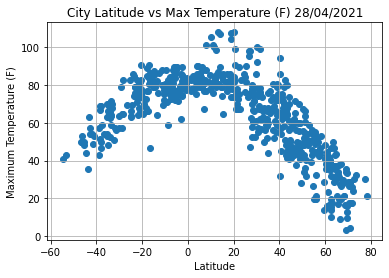

In [107]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"])
plt.title("City Latitude vs Max Temperature (F) 28/04/2021")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid()

#### Explanation
* In the previous plot, we are seeing the maximum temperature vs latitude of our cities, trying to see if there is a relationship between these variables.

## Latitude vs. Humidity Plot

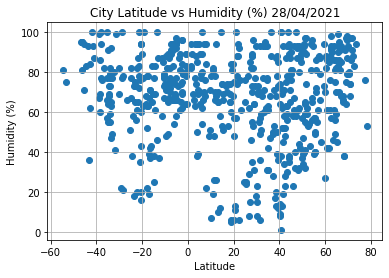

In [111]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"])
plt.title("City Latitude vs Humidity (%) 28/04/2021")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#### Explanation
* In the previous plot, we are seeing the humidity vs latitude of our cities, trying to see if there is a relationship between these variables.

## Latitude vs. Cloudiness Plot

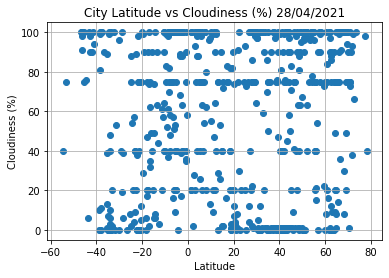

In [109]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"])
plt.title("City Latitude vs Cloudiness (%) 28/04/2021")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#### Explanation
* In the previous plot, we are seeing the cloudiness vs latitude of our cities, trying to see if there is a relationship between these variables.

## Latitude vs. Wind Speed Plot

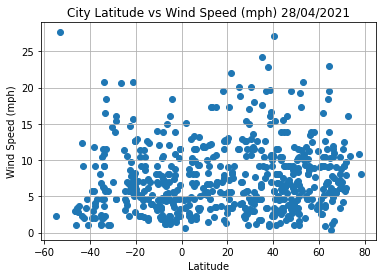

In [110]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"])
plt.title("City Latitude vs Wind Speed (mph) 28/04/2021")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#### Explanation
* In the previous plot, we are seeing the wind speed vs latitude of our cities, trying to see if there is a relationship between these variables.

## Linear Regression

In [122]:
northern_hem_df = clean_city_data.loc[clean_city_data["Lat"]>=0,:]
southern_hem_df = clean_city_data.loc[clean_city_data["Lat"]<0,:]
import scipy.stats as sts

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: -0.8578753645711286


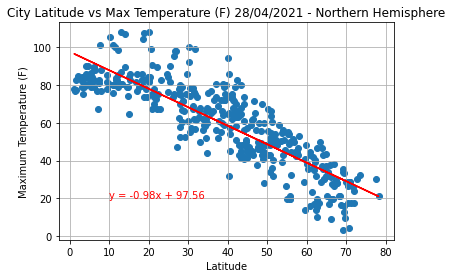

In [128]:
x_values = northern_hem_df["Lat"]
y_values =northern_hem_df["Max Temp"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(10,20),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Max Temp"])
plt.title("City Latitude vs Max Temperature (F) 28/04/2021 - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid()
print("The correlation coefficient is: "+str(pearson_r[0]))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is: 0.7734939658807423


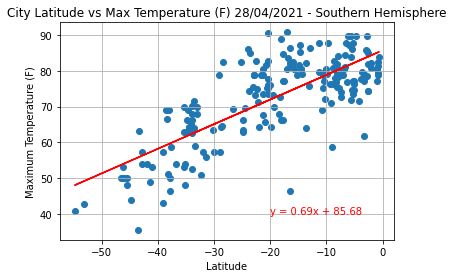

In [134]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Max Temp"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(-20,40),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Max Temp"])
plt.title("City Latitude vs Max Temperature (F) 28/04/2021 - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.grid()
print("The correlation coefficient is: "+str(pearson_r[0]))

#### Explanation
* In the previous two plots, we are seeing the max temperature vs latitude of our cities, but separating the plots in northern and southern hemispheres. I calculated the correlation coefficients for both groups of data, and both are superior to 0.75. Hence, for the lineregress, it is very possible that we can calculate the max temperature of any city with our equation of the line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation is: 0.1421954707795547


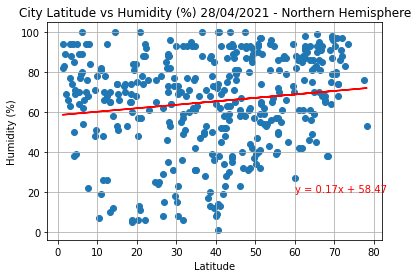

In [136]:
x_values = northern_hem_df["Lat"]
y_values =northern_hem_df["Humidity"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(60,20),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Humidity"])
plt.title("City Latitude vs Humidity (%) 28/04/2021 - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print("The correlation is: "+str(pearson_r[0]))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation is: -0.009118173968455386


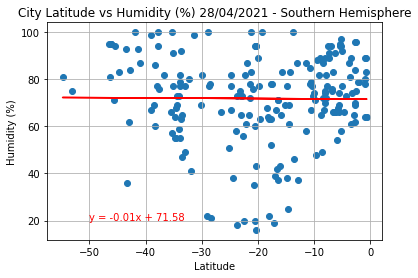

In [137]:
x_values = southern_hem_df["Lat"]
y_values = southern_hem_df["Humidity"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(-50,20),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Humidity"])
plt.title("City Latitude vs Humidity (%) 28/04/2021 - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
print("The correlation is: "+str(pearson_r[0]))

#### Explanation
* In the previous two plots, we are seeing the humidity vs latitude of our cities, but separating the plots in northern and southern hemispheres. I calculated the correlation coefficients for both groups of data, and both are really near to 0. This allows us to think that there is no relation between Humidity and Latitude, hence we can say that our line does not allow to obtain the humidity for a certain latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation is: 0.08365838388595503


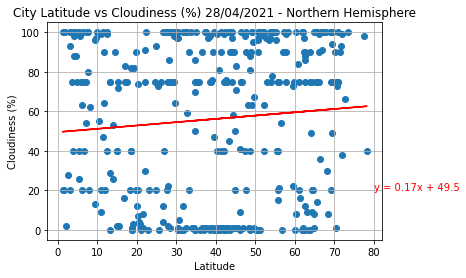

In [138]:
x_values = northern_hem_df["Lat"]
y_values =northern_hem_df["Cloudiness"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(80,20),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness (%) 28/04/2021 - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print("The correlation is: "+str(pearson_r[0]))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation is: 0.11746578957304658


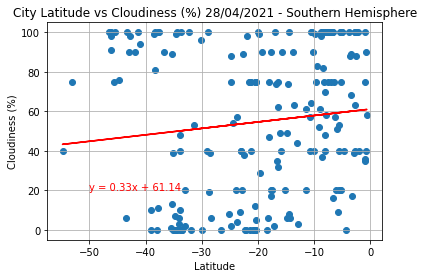

In [141]:
x_values = southern_hem_df["Lat"]
y_values =southern_hem_df["Cloudiness"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(-50,20),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Cloudiness"])
plt.title("City Latitude vs Cloudiness (%) 28/04/2021 - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
print("The correlation is: "+str(pearson_r[0]))

#### Explanation
* In the previous two plots, we are seeing the cloudiness vs latitude of our cities, but separating the plots in northern and southern hemispheres. I calculated the correlation coefficients for both groups of data, and both are really near to 0. This allows us to think that there is no relation between Cloudiness and Latitude, hence we can say that our line does not allow to obtain the cloudiness for a certain latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation is: 0.0325200320291796


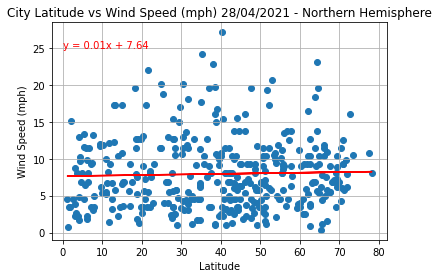

In [146]:
x_values = northern_hem_df["Lat"]
y_values =northern_hem_df["Wind Speed"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(0,25),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(northern_hem_df["Lat"],northern_hem_df["Wind Speed"])
plt.title("City Latitude vs Wind Speed (mph) 28/04/2021 - Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print("The correlation is: "+str(pearson_r[0]))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation is: -0.011987733372254394


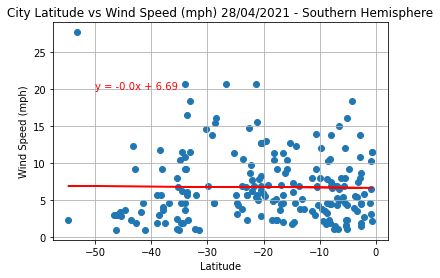

In [145]:
x_values = southern_hem_df["Lat"]
y_values =southern_hem_df["Wind Speed"] 
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = "y = "+str(round(slope,2))+"x + "+str(round(intercept,2))
plt.plot(x_values,regress_values,"-r")
plt.annotate(line_eq,(-50,20),color="red")
pearson_r = sts.pearsonr(x_values,y_values)
plt.scatter(southern_hem_df["Lat"],southern_hem_df["Wind Speed"])
plt.title("City Latitude vs Wind Speed (mph) 28/04/2021 - Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
print("The correlation is: "+str(pearson_r[0]))

#### Explanation
* In the previous two plots, we are seeing the wind speed vs latitude of our cities, but separating the plots in northern and southern hemispheres. I calculated the correlation coefficients for both groups of data, and both are really near to 0. This allows us to think that there is no relation between wind speed and Latitude, hence we can say that our line does not allow to obtain the humidity for a certain latitude